# Setup

In [1]:
include(joinpath("..","src","setup.jl"))
using SampledSignals
SampledSignals.embed_javascript()

# shepard tones

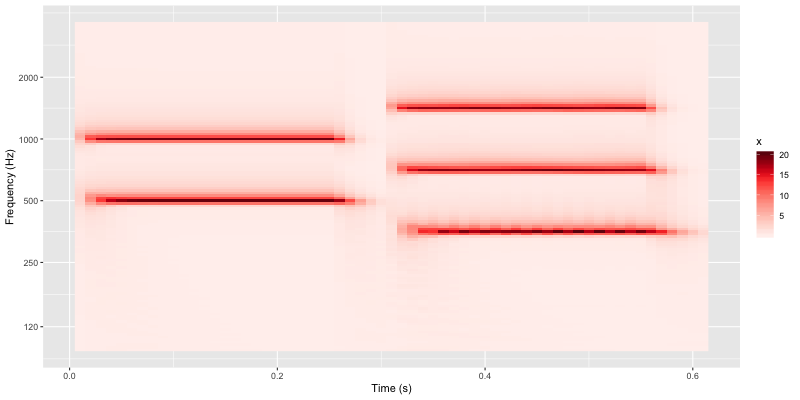

RObject{VecSxp}


In [15]:
import AuditoryBistabilityLE: tone, silence
a = tone(500Hz,250ms) .+ tone(1000Hz,250ms)
b = tone(353Hz,250ms) .+ tone(707Hz,250ms) .+ tone(1414Hz,250ms)
shepard = [a; silence(50ms); b; silence(50ms)]
rplot(audiospect(shepard))

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:00


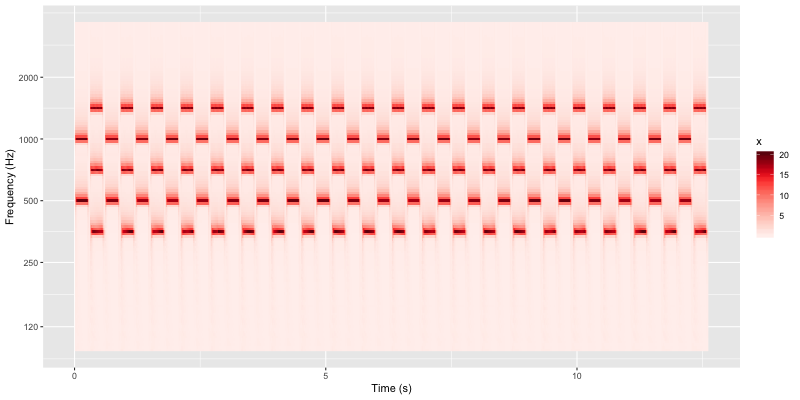

RObject{VecSxp}


In [16]:
scene = shepard
for repeat = 1:20
    scene = [scene; shepard]
end
rplot(audiospect(scene))

# non-bistable scene analysis

In [22]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:f_c_m] - 100) < 1 &&
  abs(row[:f_c_a] - 5) < 1 &&
  row[:Δf] == 12
end
params[:f_c_m] = 0
params[:f_c_a] = 0
params[:f_c_σ] = 0

settings = TOML.parsefile(joinpath(src,"settings.toml"))
settings["rates"]["freq_limits_Hz"] = [200.0,1500.0]
settings["nmf"]["ncomponents"] = 2
settings["track"]["analyze"]["max_sources"] = 2
settings["track"]["analyze"]["freq_ridge"] = 2
settings["track"]["analyze"]["scale_ridge"] = 1e-6
settings["track"]["analyze"]["ridge_threshold"] = 0.05
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.05
settings["percept_lengths"]["window_ms"] = 400
settings["percept_lengths"]["bandwidth_threhsold"] = 0.25

0.25

In [23]:
result = bistable_model(scene,params,settings,intermediate_results=true,progressbar=true)

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
┌ Info: 23.02% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:02


(primary_source = Auditory Spectrogram:
Δt = 0.02 s
decay_tc = 8.0
nonlinear = -2.0
octave_shift = -1.0
freq_step = 2
fs = 8000.0 Hz
cochlear = ShammaModel.CochFilters(ShammaModel.Filter[Filter([1.0, -1.5717, -0.305291, 0.311611, 0.495021, 0.421474, 0.226044, 0.00811504, -0.169188, -0.269636  …  0.0348376, 0.155335, 0.226806, 0.225964, 0.14635, 0.00321075, -0.158496, -0.258709, -0.175938, 0.25814], [0.0029227, -0.00172649, -0.00261021, -0.00166306, -0.000174998, 0.00108626, 0.00175859, 0.00177431, 0.00125747, 0.000437876  …  -0.00130959, -0.000847898, -0.00016522, 0.000526933, 0.000994108, 0.00104677, 0.000618408, -0.000131848, -0.000712392, -0.000169563]), Filter([1.0, -1.581, -0.296031, 0.32078, 0.497987, 0.417618, 0.218232, -0.00029935, -0.174362, -0.269565  …  0.040518, 0.156546, 0.223208, 0.218762, 0.1382, -0.00186547, -0.157067, -0.250378, -0.167, 0.250223], [0.00300779, -0.001786, -0.0026806, -0.0016979, -0.000169949, 0.0011165, 0.00179647, 0.00180569, 0.0012771, 0.000447064  … 

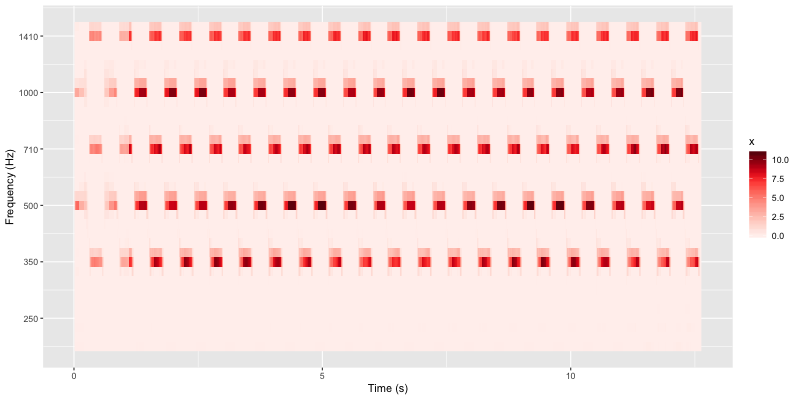

RObject{VecSxp}


In [24]:
rplot(result.primary_source)

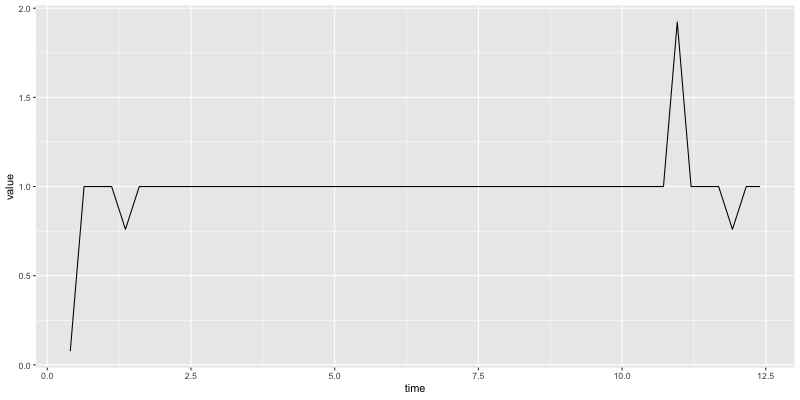

RObject{VecSxp}


In [25]:
rplot(result.percepts.bratio)

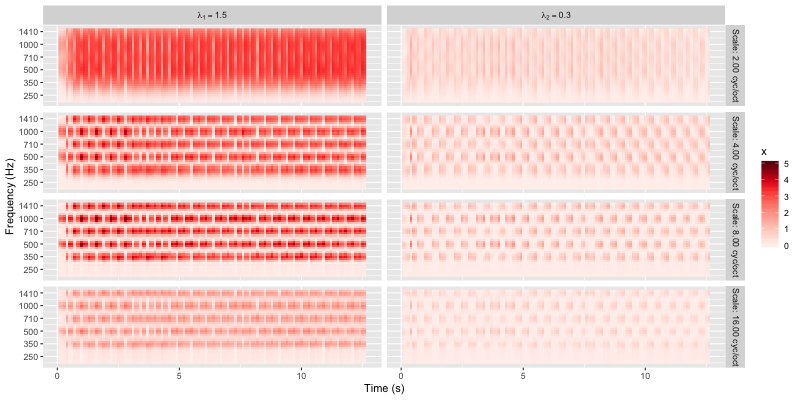

RObject{VecSxp}


In [29]:
rplot(result.cohere)

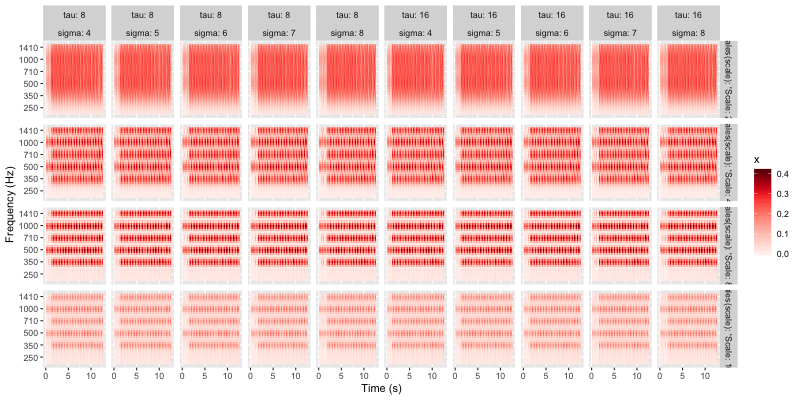

RObject{VecSxp}


In [26]:
rplot(result.sources.tracks)

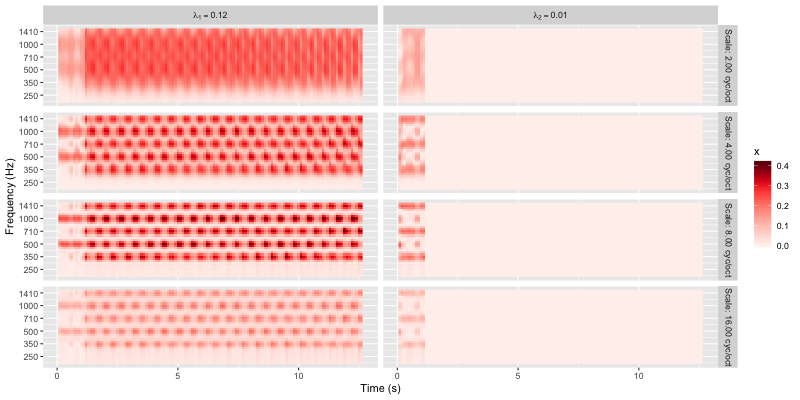

RObject{VecSxp}


In [28]:
rplot(result.sources.tracks[1])

It does appear from the above graph that the two and three tone stimuli can be spearated. The reall issue is that we need some notion of direction. This isn't something generated in earlier layers, so it is a little hard to see how bistability there would lead to bistability in the directional response - 

one *might* invision a competition that suppresses some tones and not others in the early representation that then affects how likely a particular direction is selected.

In any case this will take work to make happen becuase we still need something to determine direction. This is essentially bistability of the pitch processing.

# context stimuli

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01


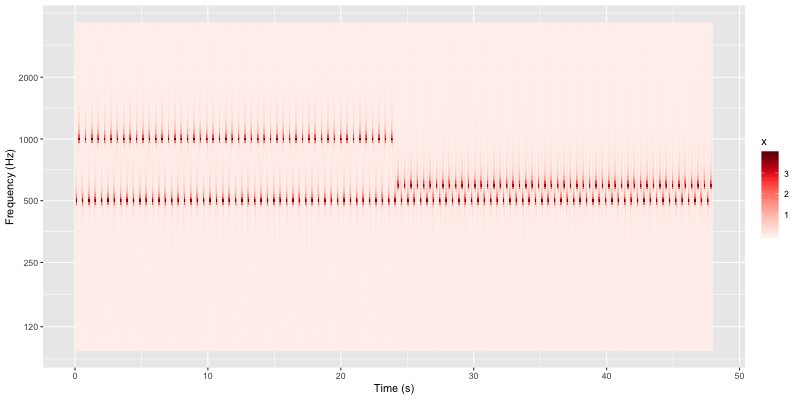

RObject{VecSxp}


In [2]:
import AuditoryBistabilityLE: tone, silence, normpower, dB, amplify
scene12 = [ab(120ms,120ms,1,50,500Hz,12); ab(120ms,120ms,1,50,500Hz,3)] |> normpower |> amplify(-10dB)
rplot(audiospect(scene12))

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01


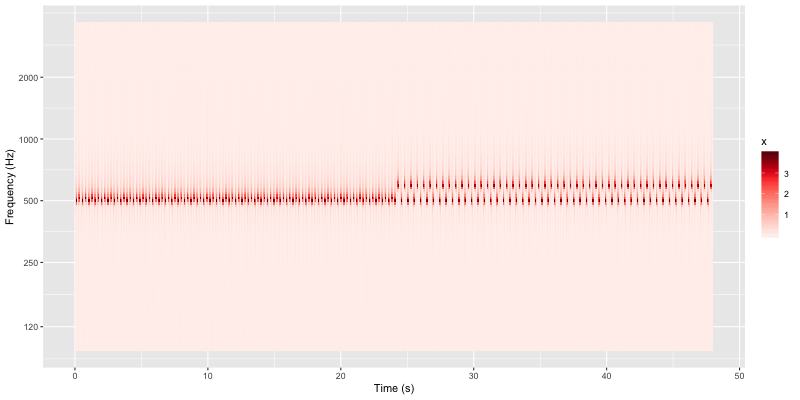

RObject{VecSxp}


In [3]:
import AuditoryBistabilityLE: tone, silence
scene05 = [ab(120ms,120ms,1,50,500Hz,0.5); ab(120ms,120ms,1,50,500Hz,3)] |> normpower |> amplify(-10dB)
rplot(audiospect(scene05))

In [87]:
paramfile = joinpath("..","data","count_lengths","run_2018-09-12",
                     "individual_extremes_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 100) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

settings = TOML.parsefile(joinpath(src,"settings.toml"))
settings["track"]["analyze"]["normalize"] = true
settings["track"]["analyze"]["min_norm"] = 0.05
settings["percept_lengths"]["window_ms"] = 400
settings["percept_lengths"]["bandwidth_threhsold"] = 0.25

settings["track"]["analyze"]["source_prior_bias"] = [0,0,1,0,0,0].*30

6-element Array{Int64,1}:
  0
  0
 30
  0
  0
  0

In [88]:
result = bistable_model(100,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:02
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:01


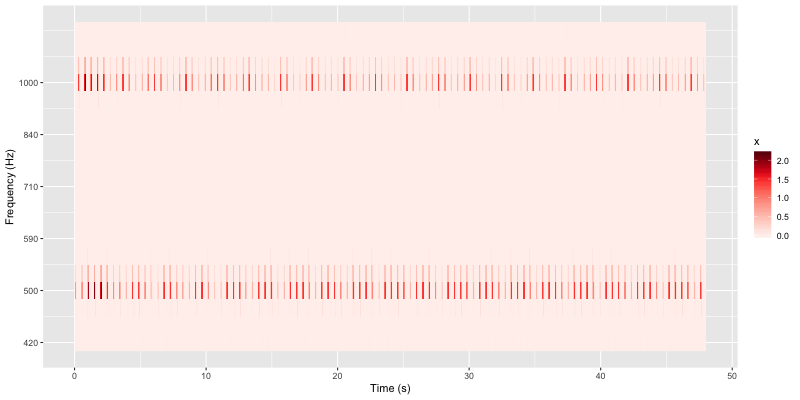

RObject{VecSxp}


In [89]:
rplot(result.primary_source)

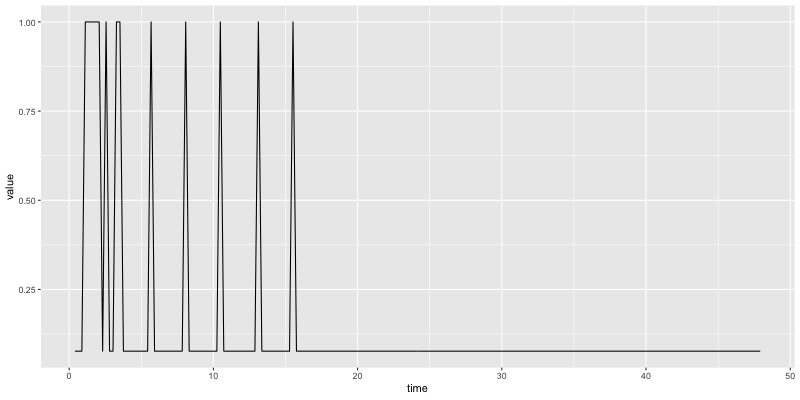

RObject{VecSxp}


In [91]:
rplot(result.percepts.bratio)

In [92]:
result = bistable_model(scene12,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:02
┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:01


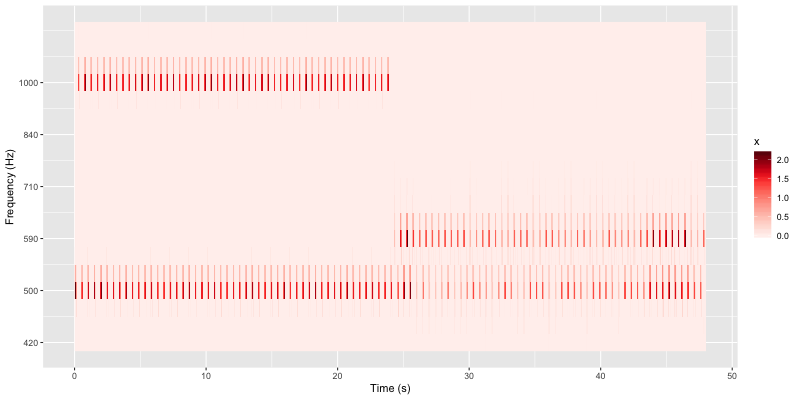

RObject{VecSxp}


In [93]:
rplot(result.primary_source)

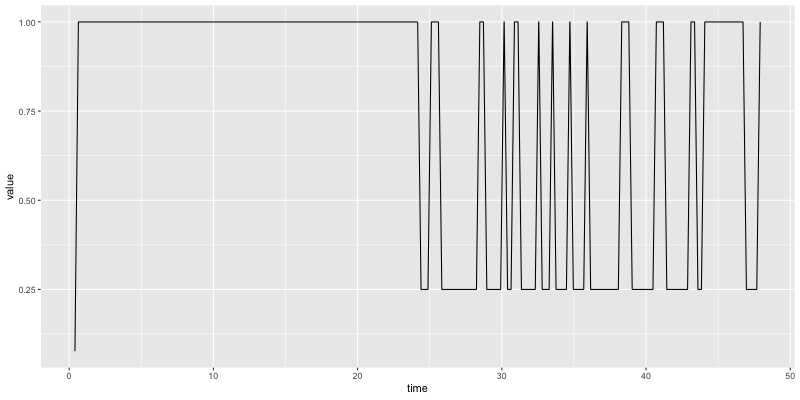

RObject{VecSxp}


In [94]:
rplot(result.percepts.bratio)

I don't understnad why this is leading to 12st fusion... why would it be different?

In [95]:
result = bistable_model(scene12[0s .. 24s],params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:01


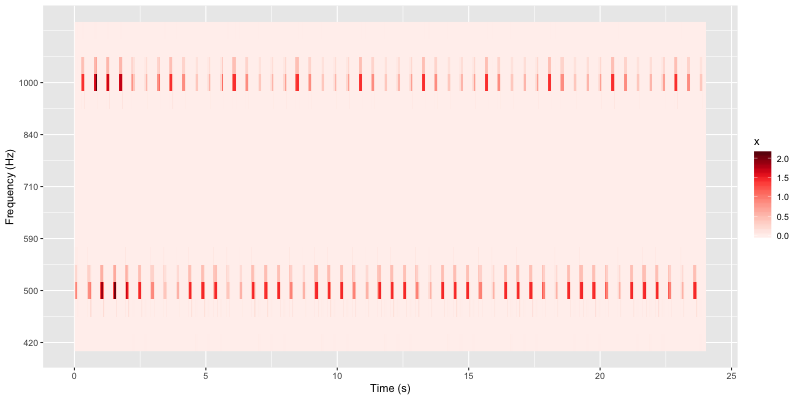

RObject{VecSxp}


In [96]:
rplot(result.primary_source)

It appears to just take a very tiny stimulus at the end

In [105]:
result = bistable_model(scene12[0s .. 25s],params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:01


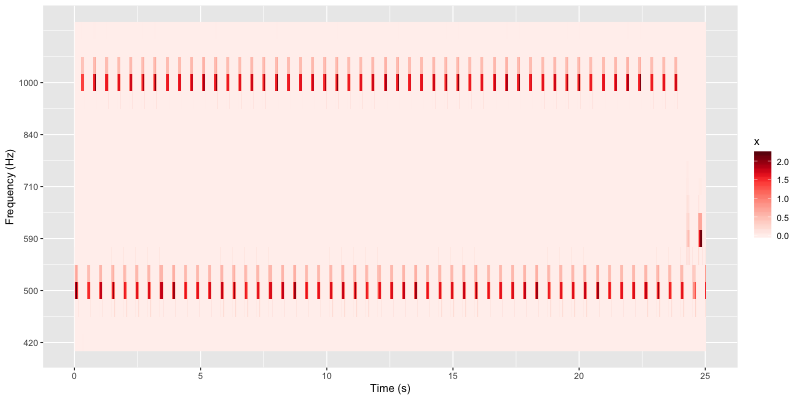

RObject{VecSxp}


In [106]:
rplot(result.primary_source)

In [110]:
result = bistable_model(scene05,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
┌ Info: 0.62% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/googledrive/juliadev/AuditoryBistabilityLE/src/nmf.jl:44
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:01


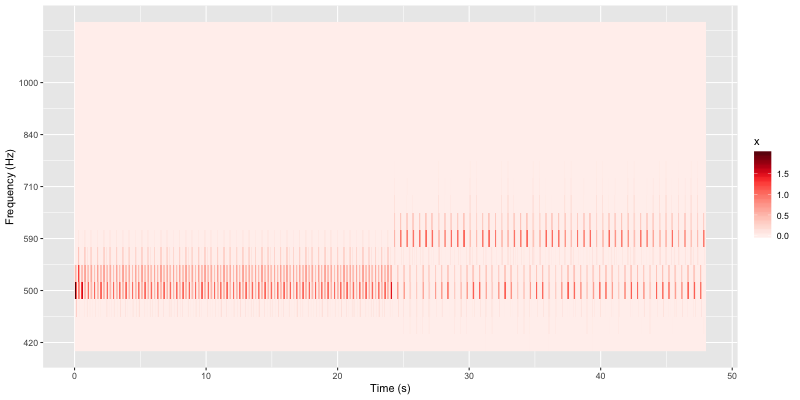

RObject{VecSxp}


In [111]:
rplot(result.primary_source)

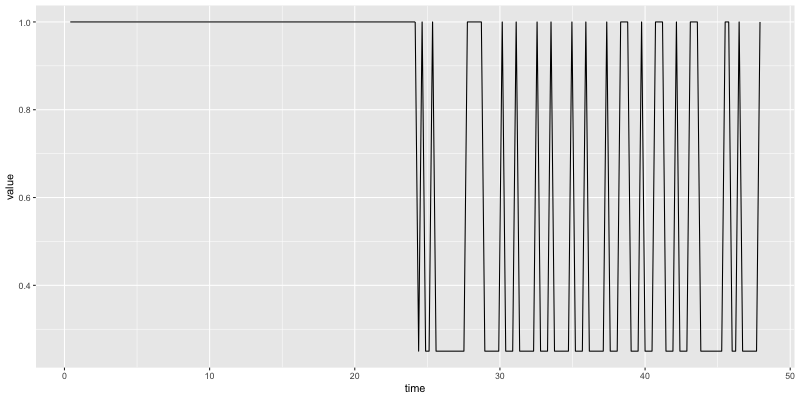

RObject{VecSxp}


In [112]:
rplot(result.percepts.bratio)

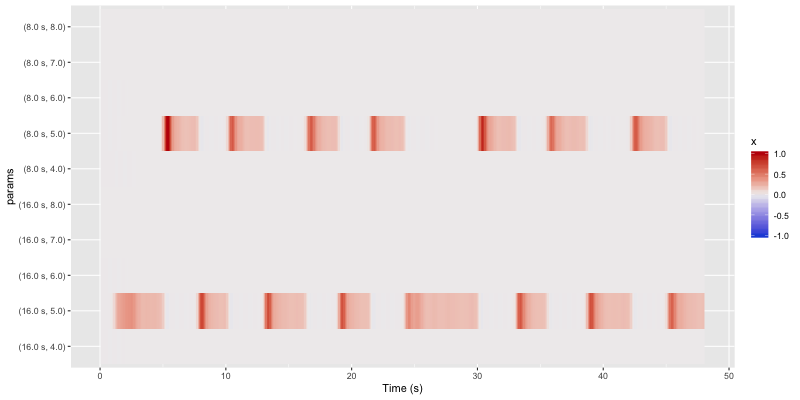

RObject{VecSxp}


In [113]:
rplot(result.sources.outweights)

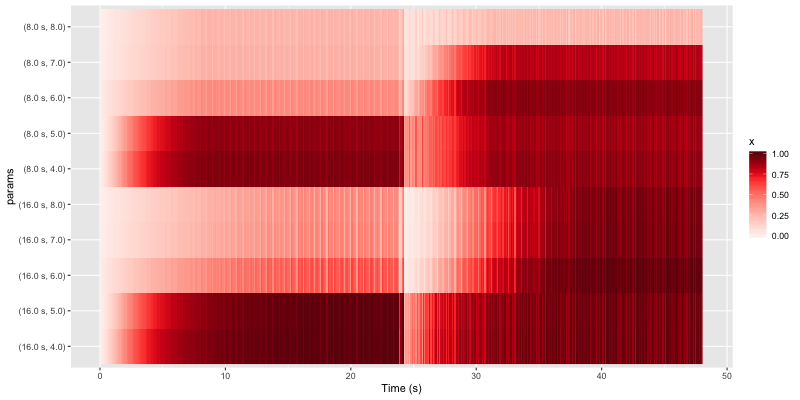

RObject{VecSxp}


In [118]:
rplot(result.sources.inweights)

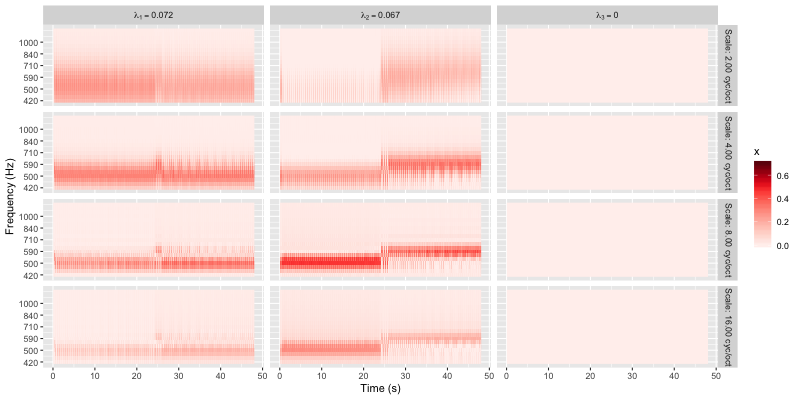

RObject{VecSxp}


In [115]:
rplot(result.sources.tracks[2])

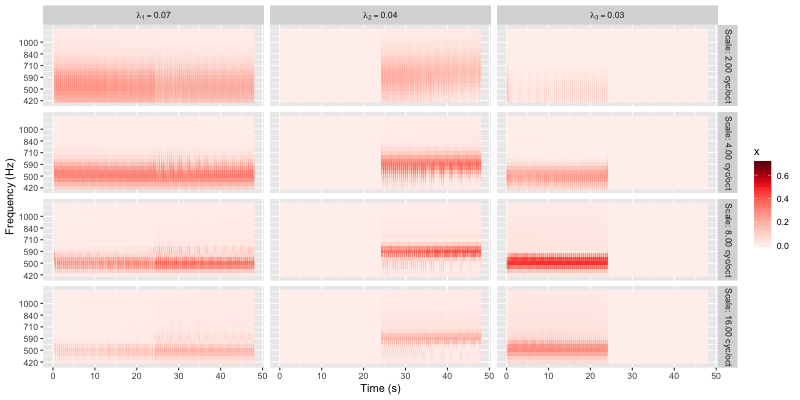

RObject{VecSxp}


In [116]:
rplot(result.sources.tracks[7])